# Task 1: Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
mushroom_df = pd.read_csv(r"D:\Excelr\Assignments\SVM\mushroom.csv")

In [4]:
# Drop index column
mushroom_df = mushroom_df.drop(columns=['Unnamed: 0'])

In [5]:
# Select numerical features
numeric_cols = ['stalk_height', 'cap_diameter']

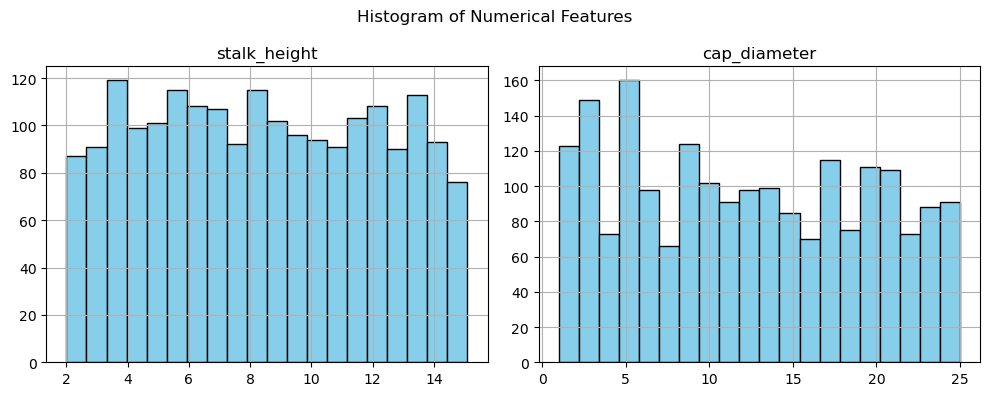

In [6]:
# Histograms
mushroom_df[numeric_cols].hist(bins=20, figsize=(10, 4), color='skyblue', edgecolor='black')
plt.suptitle('Histogram of Numerical Features')
plt.tight_layout()
plt.show()

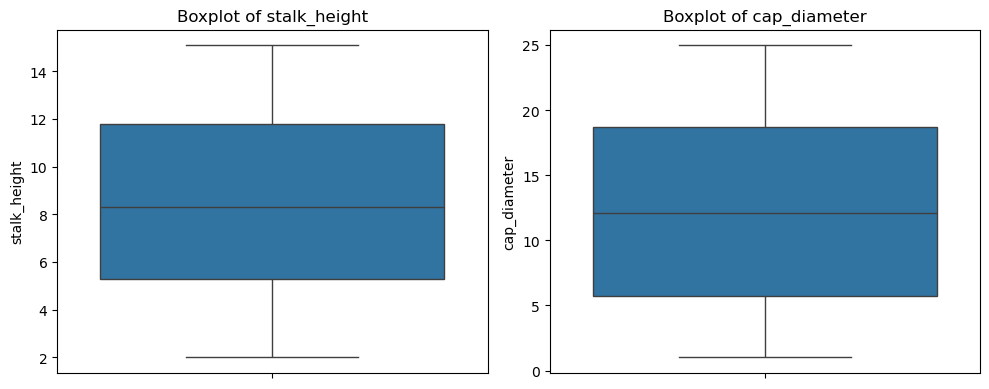

In [7]:
# Boxplots
plt.figure(figsize=(10, 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(data=mushroom_df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

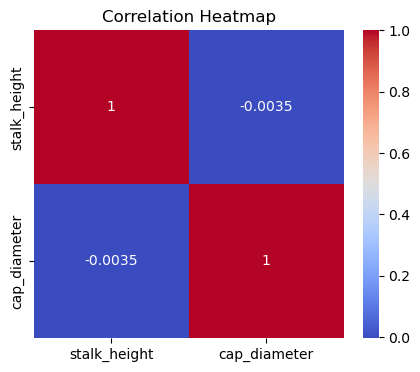

In [8]:
# Correlation heatmap
corr_matrix = mushroom_df[numeric_cols].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Task 2: Data Preprocessing

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [11]:
# Encode all categorical variables
label_encoders = {}
for col in mushroom_df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    mushroom_df[col] = le.fit_transform(mushroom_df[col])
    label_encoders[col] = le

In [12]:
# Feature and target split
X = mushroom_df.drop(columns=['class'])
y = mushroom_df['class']

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 3: Data Visualization

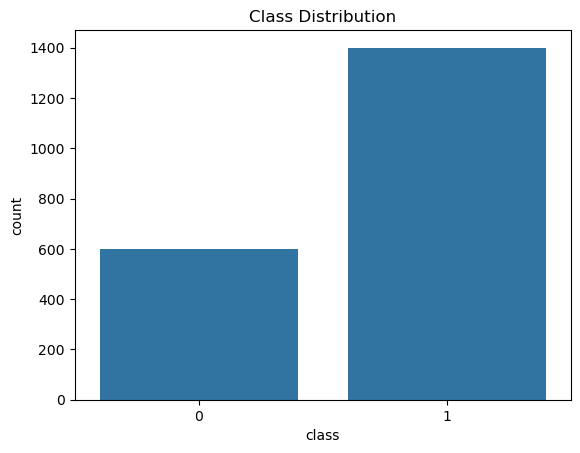

In [15]:
# Class distribution
sns.countplot(x='class', data=mushroom_df)
plt.title('Class Distribution')
plt.show()

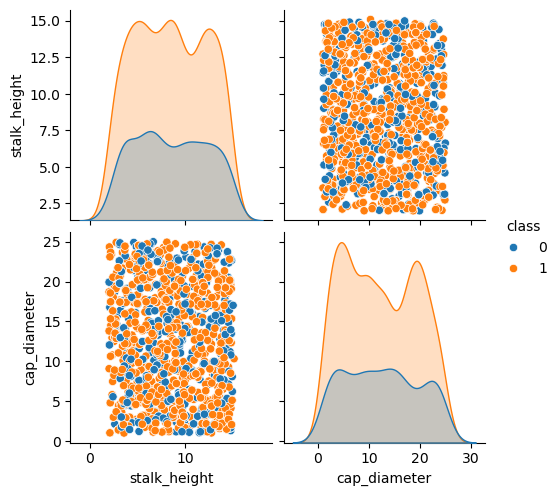

In [16]:
# Pairplot of numerical features with class hue
sns.pairplot(mushroom_df[['stalk_height', 'cap_diameter', 'class']], hue='class')
plt.show()

# Task 4: SVM Implementation

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [19]:
# Train SVM model
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

SVC()

In [20]:
# Predict and evaluate
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

Accuracy: 0.6675


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Task 5: Visualization of SVM Results

In [22]:
from sklearn.decomposition import PCA

In [23]:
# PCA for visualization
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

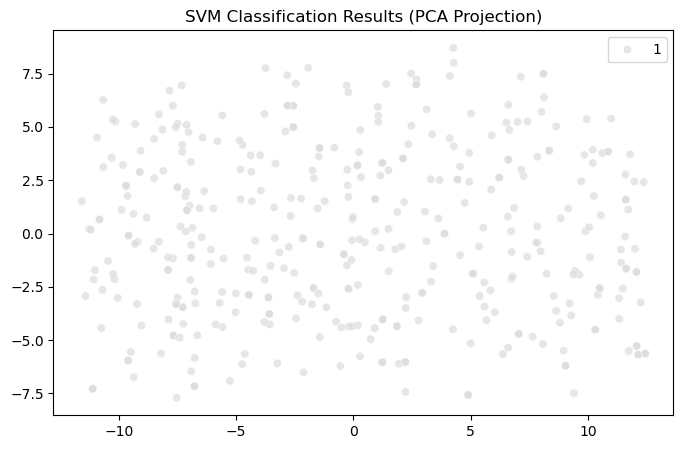

In [24]:
# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred, palette='coolwarm', alpha=0.7)
plt.title("SVM Classification Results (PCA Projection)")
plt.show()

# Task 6: Parameter Tuning and Optimization

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [28]:
# Grid search
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [29]:
# Best results
print("Best Parameters:", grid_search.best_params_)
print(f"Best Score: {grid_search.best_score_:.4f}")

Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best Score: 0.8506


# Task 7: Comparison and Analysis

In [31]:
# Compare different kernels
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{kernel.capitalize()} Kernel Accuracy: {acc:.4f}")

Linear Kernel Accuracy: 0.6675
Poly Kernel Accuracy: 0.6925
Rbf Kernel Accuracy: 0.6675
